In [3]:
import numpy as np 
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline,LSQUnivariateSpline

import matplotlib.pyplot as plt
# plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (8,6)

In [4]:
data = np.genfromtxt('Data/SensitivityVsFiducialVolume.txt')
print(data)

[[1.00000000e+03 9.68817401e+27]
 [1.50000000e+03 1.15082067e+28]
 [2.00000000e+03 1.26407604e+28]
 [2.50000000e+03 1.29112825e+28]
 [3.28100000e+03 1.32000000e+28]]


In [5]:
## 2020 Baseline sensitivity and discovery potential numbers 
Data = {}
Data['Baseline Discovery'] = {} 
Data['Baseline Discovery']['FidMass'] = np.array([3281,2500.,2000.,1500.,1000.])
Data['Baseline Discovery']['Halflife'] = np.array([7.4e27,7.2e27, 7.0e27, 6.4e27, 5.3e27])

Data['Baseline Sensitivity'] = {} 
Data['Baseline Sensitivity']['FidMass'] = data[:,0]
Data['Baseline Sensitivity']['Halflife'] = data[:,1]

Data['Counting Sensitivity'] = {}
Data['Counting Sensitivity']['FidMass'] = np.array([1000.,1500.,2000.,2500.,3000.,3281.])
Data['Counting Sensitivity']['Halflife'] = np.array([4.79752690e+27, 5.86401023e+27, \
                                                     6.14903188e+27, 5.99792007e+27, \
                                                     5.52388260e+27, 5.24807525e+27])

Data['Counting Discovery'] = {}
Data['Counting Discovery']['FidMass'] = np.array([1000.,1500.,2000.,2500.,3000.,3281.])
Data['Counting Discovery']['Halflife'] = np.array([2.77791006e+27, 3.06482038e+27,\
                                                   3.01628591e+27, 2.80778895e+27,\
                                                   2.52705994e+27, 2.37256377e+27])


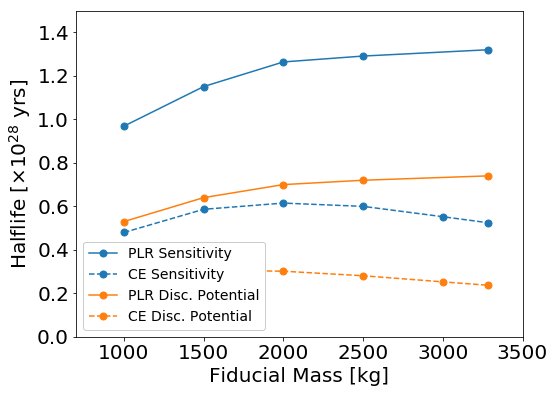

In [6]:
fig = plt.figure()


plt.plot(Data['Baseline Sensitivity']['FidMass'],\
        Data['Baseline Sensitivity']['Halflife']/1.e28,\
        '-o',\
         markersize=7,\
        color=colors[0],\
        label='PLR Sensitivity')

plt.plot(Data['Counting Sensitivity']['FidMass'],\
        Data['Counting Sensitivity']['Halflife']/1.e28,\
        '--o',\
         markersize=7,\
        color=colors[0],\
        label='CE Sensitivity')

plt.plot(Data['Baseline Discovery']['FidMass'],\
        Data['Baseline Discovery']['Halflife']/1.e28,\
        '-o',\
         markersize=7,\
        color=colors[1],\
        label='PLR Disc. Potential')

plt.plot(Data['Counting Discovery']['FidMass'],\
        Data['Counting Discovery']['Halflife']/1.e28,\
        '--o',\
         markersize=7,\
        color=colors[1],\
        label='CE Disc. Potential')

plt.xlim(700.,3500.)
plt.ylim(0.,1.5)
plt.legend(loc='lower left',fontsize=14,framealpha=1.,)
plt.xlabel('Fiducial Mass [kg]')
plt.ylabel(r'Halflife [$\times10^{28}$ yrs]')
plt.savefig('sensitivity_and_dicovery_vs_fiducial_volume.png',dpi=200,bbox_inches='tight')




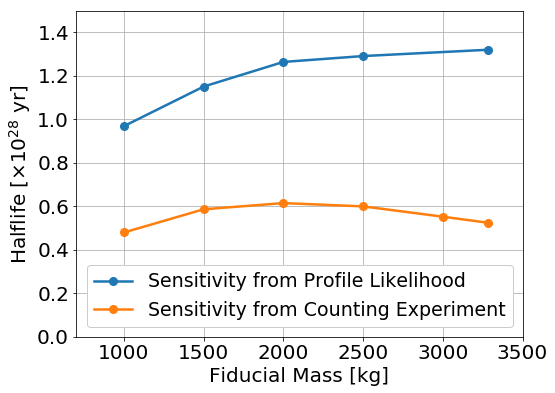

In [9]:
fig = plt.figure()


plt.plot(Data['Baseline Sensitivity']['FidMass'],\
        Data['Baseline Sensitivity']['Halflife']/1.e28,\
        '-o',\
         markersize=8,\
         linewidth=2.5,\
        color=colors[0],\
        label='Sensitivity from Profile Likelihood')

plt.plot(Data['Counting Sensitivity']['FidMass'],\
        Data['Counting Sensitivity']['Halflife']/1.e28,\
        '-o',\
         markersize=8,\
         linewidth=2.5,\
        color=colors[1],\
        label='Sensitivity from Counting Experiment')

# plt.plot(Data['Baseline Discovery']['FidMass'],\
#         Data['Baseline Discovery']['Halflife']/1.e28,\
#         '-o',\
#          markersize=7,\
#         color=colors[1],\
#         label='PLR Disc. Potential')

# plt.plot(Data['Counting Discovery']['FidMass'],\
#         Data['Counting Discovery']['Halflife']/1.e28,\
#         '--o',\
#          markersize=7,\
#         color=colors[1],\
#         label='CE Disc. Potential')
plt.grid()
plt.xlim(700.,3500.)
plt.ylim(0.,1.5)
plt.legend(loc='lower right',fontsize=19,framealpha=1.,)
plt.xlabel('Fiducial Mass [kg]')
plt.ylabel(r'Halflife [$\times10^{28}$ yr]')
plt.savefig('sensitivity_vs_fiducial_volume.png',dpi=200,bbox_inches='tight')


